# Convolution For Dual Channel Sound Effects

We use scipy.io.wavfile module to handle .wav files. Using this module, one can easily read and write WAV files.

### Imports

In [1]:
import scipy.io.wavfile as sciw
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Files

In [2]:
impulse_response_file = "long_echo_hall_16k.wav"
song_file = "BheegiRegular.wav"

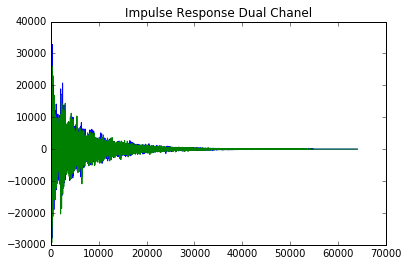

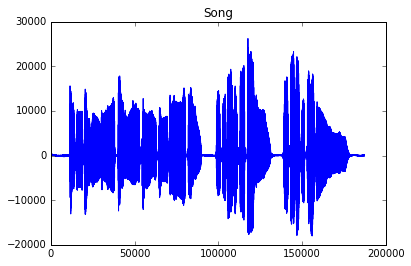

In [3]:
sample_rate, impulse_response = sciw.read(impulse_response_file)
impulse_response = np.int64(impulse_response)
sample_rate, song_data = sciw.read(song_file)
song_data = np.int64(song_data)
plt.plot(impulse_response)
plt.title("Impulse Response Dual Chanel")
plt.show()
plt.plot(song_data)
plt.title("Song")
plt.show()

### Convolution

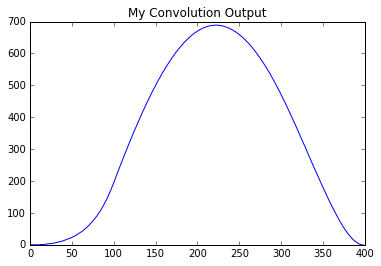

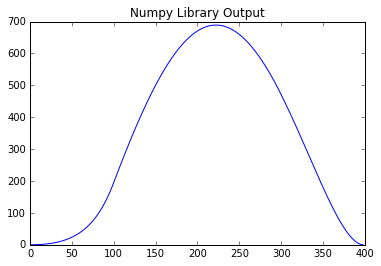

In [4]:
def get_convoulution(impulse_response, song_data):
    impr_len = len(impulse_response)
    song_len = len(song_data)
    output = np.zeros((song_len+impr_len-1), dtype=np.int64)
    new_song = np.zeros(2*impr_len+song_len-2) # with padded zeroes
    new_song[impr_len-1:impr_len+song_len-1] += song_data
    for i in range(impr_len+song_len-1):
        output[i] = np.dot(impulse_response[::-1], new_song[i:i+impr_len])
    return output
        
impulse = np.exp(np.linspace(0, np.pi, 100))
song = np.sin(np.linspace(0, np.pi, 300))
    
one_output = get_convoulution(impulse, song)
plt.plot(one_output)
plt.title("My Convolution Output")
plt.show()
two_output = np.convolve(impulse, song)
plt.plot(two_output)
plt.title("Numpy Library Output")
plt.show()

### Output Calculation

In [5]:
import time

In [6]:
start_time = time.time()
channel_one_output = np.convolve(impulse_response[:,0], song_data)
channel_two_output = np.convolve(impulse_response[:,1], song_data)
print("Time taken for 2 channel convolution (in s): %f" %(time.time()-start_time))

Time taken for 2 channel convolution (in s): 20.823111


In [7]:
start_time = time.time()
channel_one_output = get_convoulution(impulse_response[:,0], song_data)
channel_two_output = get_convoulution(impulse_response[:,1], song_data)
print("Time taken for 2 channel convolution (in s): %f" %(time.time()-start_time))

Time taken for 2 channel convolution (in s): 66.146154


In [8]:
print(type(channel_one_output[0]))

<type 'numpy.int64'>


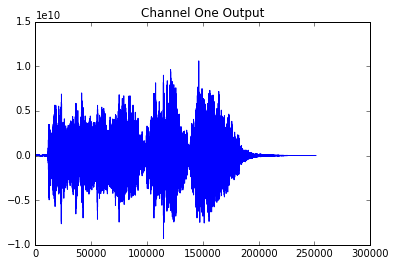

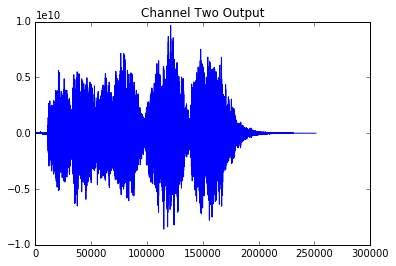

In [9]:
plt.plot(channel_one_output)
plt.title("Channel One Output")
plt.show()
plt.plot(channel_two_output)
plt.title("Channel Two Output")
plt.show()

### Output Normalization and Type Change 

Since the peak of output is of the order of $10^{10}$, we need to normalize to make peak less than or equal to $2^{15}-1$ because .wav file can be written only with 16 bit signed integers. To do this we find the maximum of above signal and divide whole output by the normalization factor given by

$$\frac{max(signal)}{2^{15}} + 1$$

Further this output is casted into $np.int16$ before writing to file. 

In [10]:
div_value = max(np.max(channel_one_output), np.max(channel_two_output))/2**15+2
print(div_value)
channel_one_normalized = np.int16([channel_one_output/div_value])
channel_two_normalized = np.int16([channel_two_output/div_value])
total_output = np.concatenate((channel_one_normalized, channel_two_normalized), axis=0).transpose()

323412


In [11]:
print(len(channel_two_normalized[0]))
print(channel_two_normalized)
print(len(channel_two_normalized[0]))
print(channel_two_normalized)
print(len(song_data))
print(len(impulse_response))

251298
[[0 0 0 ..., 0 0 0]]
251298
[[0 0 0 ..., 0 0 0]]
187232
64067


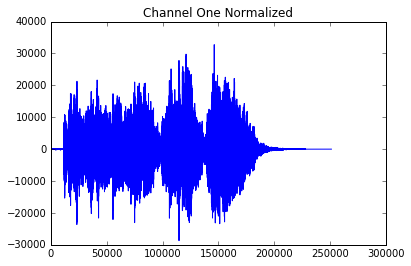

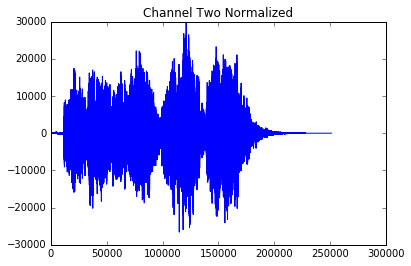

In [12]:
plt.plot(channel_one_normalized[0])
plt.title("Channel One Normalized")
plt.show()
plt.plot(channel_two_normalized[0])
plt.title("Channel Two Normalized")
plt.show()

In [13]:
print(type(total_output[0]))
print(sample_rate)
print(total_output)
print(np.max(total_output))

<type 'numpy.ndarray'>
16000
[[0 0]
 [0 0]
 [0 0]
 ..., 
 [0 0]
 [0 0]
 [0 0]]
32767


In [14]:
sciw.write("Output.wav", sample_rate, total_output)

$References:$

1. Scipy Reading WAV file. https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html
2. Scipy Writing WAV file. https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html 
3. What do the bytes in a WAV file represent? http://stackoverflow.com/questions/13039846/what-do-the-bytes-in-a-wav-file-represent
4. Numpy Reference https://docs.scipy.org/doc/numpy/reference/